# Dataset analysis 

In [1]:
import numpy as np
import math
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from typing import List, Dict
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat
import json

import tikzplotlib

from torchvision import transforms
from PIL import Image as Img

from IPython.display import Image 

plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [2]:
def load_json(filename : str) -> Dict:
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

In [3]:
base_path_raw = os.path.abspath('/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/')
model_folders = [os.path.join(base_path_raw, o) for o in os.listdir(base_path_raw) if os.path.isdir(os.path.join(base_path_raw,o)) and not o.startswith('.')]

In [4]:
model_folders

['/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/12b1beb780062c34dd2482eb02e705e2',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/309402cd6123961fdd1a827faafdea05',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/edc036f241e350ed66b07d6edebaaef2',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/365ae50c5f1f0a7320a2db9e99cd5cc8',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/f47727dbebdcd1b5f568e0217fcad821',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/0c30cf5d2687230bfb3d20b4e332ab71',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/ab60e3fb01ac94277d5b75f445473d42',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/16ad1271ac0f9f11c79a6d9e2b3cd8a4',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/40a108b1126422e410beedb74aa11453',
 '/media/jan/MastatJan/temp/results_full_dataset_2_contrast_3/e7c206f34d8805ec23b679297ef284e0',
 '/media/jan/MastatJan/temp/re

In [5]:
folder = model_folders[0]
result = load_json(os.path.join(folder, r'score_dict_final.json'))
exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
result.update({
    'model_base' : exp_dict['model']['base'],
    'context_span' : exp_dict['dataset']['context_span'],
    'loss' : exp_dict['model']['loss']
})

result

{'train_score': 0.9218780815579836,
 'train_weighted_dice': 0.9060430504144016,
 'val_score': 0.7125415387627144,
 'val_weighted_dice': 0.65084917726221,
 'train_loss': 0.005426482817649241,
 'epoch': 15,
 'waiting': 4,
 'test_dice': 0.7045384860494858,
 'test_weighted_dice': 0.6456995348996643,
 'test_iou': 0.5640591275929999,
 'test_prec': 0.6692913673441939,
 'test_recall': 0.7491003927878488,
 'test_score': 0.7045384860494858,
 'model_base': 'unet2d',
 'context_span': 3,
 'loss': 'cross_entropy'}

In [6]:
result = list()
for folder in model_folders:
    r = load_json(os.path.join(folder, r'score_dict_final.json'))
    exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
    r.update({
        'model_base' : exp_dict['model']['base'],
        'context_span' : exp_dict['dataset']['context_span'],
        'loss' : exp_dict['model']['loss']
    })
    result.append(r)

result = pd.DataFrame(result).sort_values(['test_weighted_dice', 'test_dice'], ascending = False)
result

,train_score,train_weighted_dice,val_score,val_weighted_dice,train_loss,epoch,waiting,test_dice,test_weighted_dice,test_iou,test_prec,test_recall,test_score,model_base,context_span,loss
2,0.961236,0.953535,0.812707,0.773316,0.002601,49,0,0.801245,0.758672,0.680605,0.750694,0.867133,0.801245,fcn8_vgg16,0,cross_entropy
11,0.948136,0.937654,0.796303,0.753627,0.003491,22,4,0.797494,0.752692,0.677485,0.741776,0.870374,0.797494,fcn8_vgg16,1,cross_entropy
16,0.933321,0.919967,0.799074,0.756370,0.004516,15,4,0.790756,0.744971,0.668116,0.730645,0.867050,0.790756,fcn8_vgg16,3,cross_entropy
12,0.920350,0.904357,0.759678,0.707821,0.005402,13,4,0.768394,0.719089,0.639314,0.728956,0.814906,0.768394,fcn8_resnet,1,cross_entropy
14,0.949649,0.939653,0.746864,0.693197,0.003500,27,4,0.761630,0.713119,0.631065,0.726637,0.803973,0.761630,unet2d,1,cross_entropy
15,0.929930,0.915982,0.750290,0.695581,0.004743,19,4,0.765448,0.712101,0.640787,0.708914,0.838177,0.765448,fcn8_resnet,3,cross_entropy
1,0.941394,0.929729,0.768668,0.720168,0.004283,22,4,0.753172,0.702805,0.620186,0.723951,0.786397,0.753172,unet2d,0,cross_entropy
9,0.932683,0.919311,0.740436,0.685414,0.004436,23,4,0.729281,0.669526,0.597403,0.694921,0.771860,0.729281,fcn8_resnet,0,cross_entropy
0,0.921878,0.906043,0.712542,0.650849,0.005426,15,4,0.704538,0.645700,0.564059,0.669291,0.749100,0.704538,unet2d,3,cross_entropy
17,0.716493,0.659557,0.677472,0.613272,0.013981,29,4,0.695856,0.634695,0.553862,0.914524,0.576817,0.695856,fcn8_vgg16,3,weighted_cross_entropy


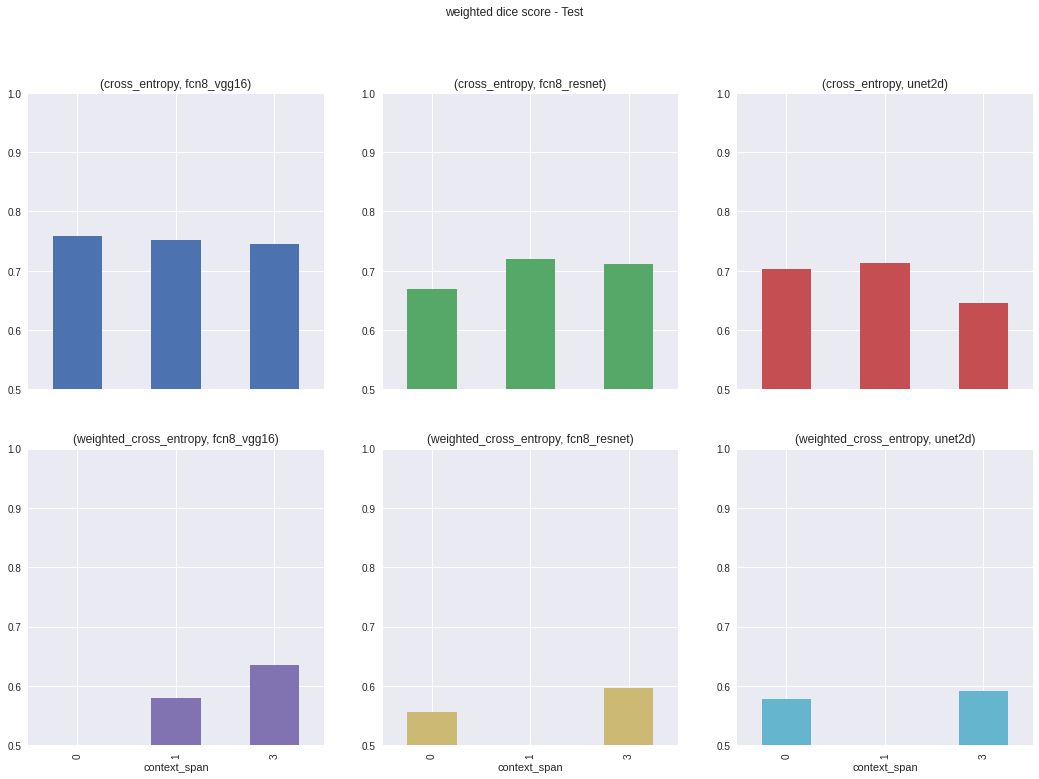

In [7]:
test_wd = result.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'test_weighted_dice')
test_wd.applymap(lambda x : round(x, 2)).to_html('test_wd.html')
test_wd.plot(kind='bar', subplots = True, layout = (2, 3), legend = False, figsize = (18, 12), ylim = (0.5, 1))
plt.suptitle('weighted dice score - Test')
plt.savefig('test_wd.png')

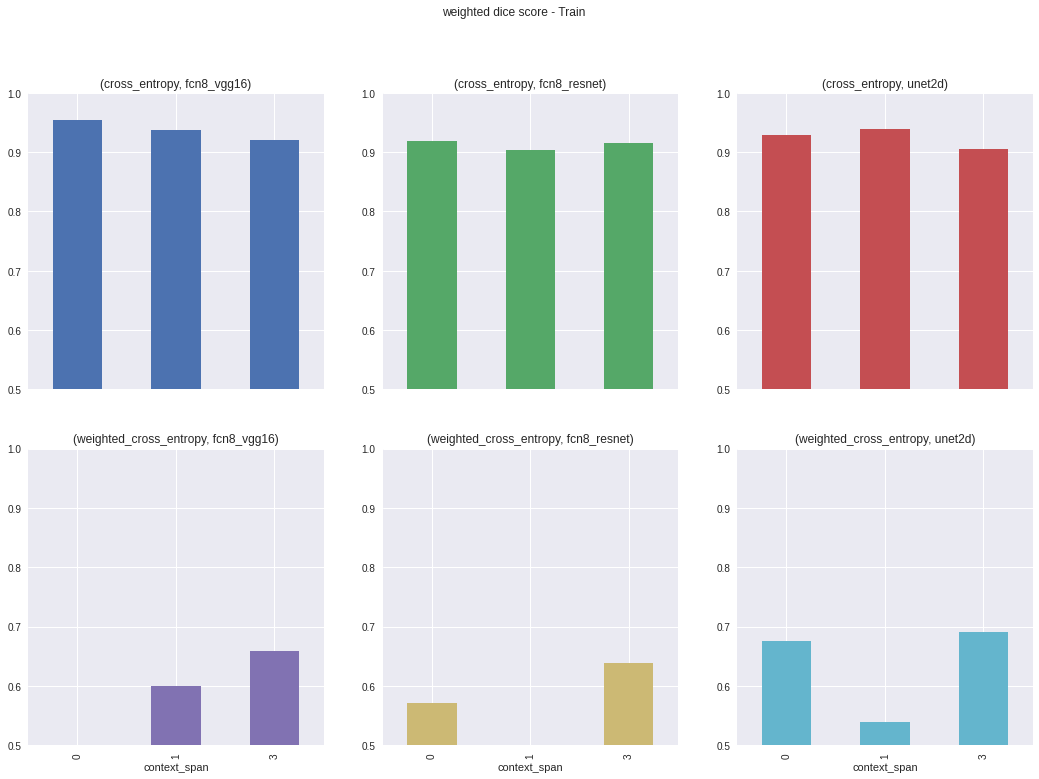

In [8]:
train_wd = result.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'train_weighted_dice')
train_wd.applymap(lambda x : round(x, 2)).to_html('train_wd.html')
train_wd.plot(kind='bar', subplots = True, layout = (2, 3), legend = False, figsize = (18, 12), ylim = (0.5, 1))
plt.suptitle('weighted dice score - Train')
plt.savefig('train_wd.png')